Author. Alexander Molinar Masters of DataScience

# Data Mining Notebook

An inspiration quote of the day

Steve Jobs once said

- “it doesn't make sense to hire smart people and tell them what to do; we hire smart people so they can tell us what to do.”  

## Goals


The goal of this project is use DataScience techniques to make future prediction of oil and gas prices.


Question:
     
     Can we use past price data to predict future prices?

The project will include the following area's of data science. 

    - Data Mining
    - Statistics and Visualization
    - Machine Learning
    
Each subject will have its own notebook.

The data for this project was downloaded directly from the government website.
https://www.eia.gov/petroleum/data.php

## Imports

Let's start out by importing all the necessary libraries that we are going to use in our project. 

In [1]:
# import built in libraries
import os
import glob
import sys

# import other libraries
import pandas as pd
pd.set_option("display.notebook_repr_html", True)

import pandas.plotting
import numpy as np

# allows inline printing in notebook
%matplotlib inline
import matplotlib.pyplot as plt

### Version information

The following notebooks were created using the following program verions. 

- Note xlrd is required by pandas read_csv function. A solution is provided below 

In [2]:
print("Pandas version is {}".format(pd.__version__))
print("Numpy version is {}".format(np.__version__))
print("Python version is {}".format(sys.version))

Pandas version is 0.22.0
Numpy version is 1.14.1
Python version is 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [3]:
# Pandas needs xlrd >= 0.9.0 for Excel support
# Use command below
# !conda install xlrd

## Data Gathering

Once the files are downloaded into the spot_prices directory, we can get list of files using glob. I copied the output from the code below into an excel file and create eia.xlsx in order to make since of the data. I originally experimented with extracting the information from the basename but felt it wasnt worth the effort since there are no consistant dilimiters. 

In an ideal production enviroment, we would have a API connection directly to the data so it could be updated periodically. 

In [4]:
spot_price_data_files = glob.glob("eia\\spot_prices\\*.csv")
spot_price_data_files

['eia\\spot_prices\\Cushing_OK_WTI_Spot_Price_FOB.csv',
 'eia\\spot_prices\\Europe_Brent_Spot_Price_FOB.csv',
 'eia\\spot_prices\\Los_Angeles_CA_Ultra-Low_Sulfur_CARB_Diesel_Spot_Price.csv',
 'eia\\spot_prices\\Los_Angeles_Reformulated_RBOB_Regular_Gasoline_Spot_Price.csv',
 'eia\\spot_prices\\Mont_Belvieu_TX_Propane_Spot_Price_FOB.csv',
 'eia\\spot_prices\\New_York_Harbor_Conventional_Gasoline_Regular_Spot_Price_FOB.csv',
 'eia\\spot_prices\\New_York_Harbor_No._2_Heating_Oil_Spot_Price_FOB.csv',
 'eia\\spot_prices\\New_York_Harbor_Ultra-Low_Sulfur_No_2_Diesel_Spot_Price.csv',
 'eia\\spot_prices\\U.S._Gulf_Coast_Conventional_Gasoline_Regular_Spot_Price_FOB.csv',
 'eia\\spot_prices\\U.S._Gulf_Coast_Kerosene-Type_Jet_Fuel_Spot_Price_FOB.csv',
 'eia\\spot_prices\\U.S._Gulf_Coast_Ultra-Low_Sulfur_No_2_Diesel_Spot_Price.csv']

### Load Custom file

Load custom file created in excel. 

In [5]:
spot_price_file_df = pd.read_excel("eia\\spot_prices\\eia.xlsx", sheet_name = "dictionary_data") 
spot_price_file_df

,file,basename,Commodity,Spot
0,eia\\spot_prices\\Cushing_OK_WTI_Spot_Price_FO...,Cushing_OK_WTI_Spot_Price_FOB.csv,Crude,Cushing
1,eia\\spot_prices\\Europe_Brent_Spot_Price_FOB...,Europe_Brent_Spot_Price_FOB.csv,Crude,Brent
2,eia\\spot_prices\\Los_Angeles_CA_Ultra-Low_Su...,Los_Angeles_CA_Ultra-Low_Sulfur_CARB_Diesel_Sp...,Diesel,Los Angeles
3,eia\\spot_prices\\Los_Angeles_Reformulated_RB...,Los_Angeles_Reformulated_RBOB_Regular_Gasoline...,Gasoline,Los Angeles
4,eia\\spot_prices\\Mont_Belvieu_TX_Propane_Spo...,Mont_Belvieu_TX_Propane_Spot_Price_FOB.csv,Propane,Mont Belvieu
5,eia\\spot_prices\\New_York_Harbor_Conventiona...,New_York_Harbor_Conventional_Gasoline_Regular_...,Gasoline,New York
6,eia\\spot_prices\\New_York_Harbor_No._2_Heati...,New_York_Harbor_No._2_Heating_Oil_Spot_Price_F...,Heating_Oil,New York
7,eia\\spot_prices\\New_York_Harbor_Ultra-Low_S...,New_York_Harbor_Ultra-Low_Sulfur_No_2_Diesel_S...,Diesel,New York
8,eia\\spot_prices\\U.S._Gulf_Coast_Conventiona...,U.S._Gulf_Coast_Conventional_Gasoline_Regular_...,Gasoline,U.S. Gulf
9,eia\\spot_prices\\U.S._Gulf_Coast_Kerosene-Ty...,U.S._Gulf_Coast_Kerosene-Type_Jet_Fuel_Spot_Pr...,Kerosene,U.S. Gulf


### Create ID for dictionary

We now need create a usefull id for our data dictionary. Creating an id column is as simple as summing the commodity and spot pandas series. Also note the addition of the semicolon as delimiter. 

In [6]:
spot_price_file_df["id"] = spot_price_file_df['Commodity']  + ";" + spot_price_file_df["Spot"]
spot_price_file_df

,file,basename,Commodity,Spot,id
0,eia\\spot_prices\\Cushing_OK_WTI_Spot_Price_FO...,Cushing_OK_WTI_Spot_Price_FOB.csv,Crude,Cushing,Crude;Cushing
1,eia\\spot_prices\\Europe_Brent_Spot_Price_FOB...,Europe_Brent_Spot_Price_FOB.csv,Crude,Brent,Crude;Brent
2,eia\\spot_prices\\Los_Angeles_CA_Ultra-Low_Su...,Los_Angeles_CA_Ultra-Low_Sulfur_CARB_Diesel_Sp...,Diesel,Los Angeles,Diesel;Los Angeles
3,eia\\spot_prices\\Los_Angeles_Reformulated_RB...,Los_Angeles_Reformulated_RBOB_Regular_Gasoline...,Gasoline,Los Angeles,Gasoline;Los Angeles
4,eia\\spot_prices\\Mont_Belvieu_TX_Propane_Spo...,Mont_Belvieu_TX_Propane_Spot_Price_FOB.csv,Propane,Mont Belvieu,Propane;Mont Belvieu
5,eia\\spot_prices\\New_York_Harbor_Conventiona...,New_York_Harbor_Conventional_Gasoline_Regular_...,Gasoline,New York,Gasoline;New York
6,eia\\spot_prices\\New_York_Harbor_No._2_Heati...,New_York_Harbor_No._2_Heating_Oil_Spot_Price_F...,Heating_Oil,New York,Heating_Oil;New York
7,eia\\spot_prices\\New_York_Harbor_Ultra-Low_S...,New_York_Harbor_Ultra-Low_Sulfur_No_2_Diesel_S...,Diesel,New York,Diesel;New York
8,eia\\spot_prices\\U.S._Gulf_Coast_Conventiona...,U.S._Gulf_Coast_Conventional_Gasoline_Regular_...,Gasoline,U.S. Gulf,Gasoline;U.S. Gulf
9,eia\\spot_prices\\U.S._Gulf_Coast_Kerosene-Ty...,U.S._Gulf_Coast_Kerosene-Type_Jet_Fuel_Spot_Pr...,Kerosene,U.S. Gulf,Kerosene;U.S. Gulf


### Check file name
It seems there maybe some spaces in the front of the file in the file column so we also need to strip the series.

In [7]:
before_values = spot_price_file_df['file'].str.len().values
print(before_values)

[51 50 77 80 61 83 71 78 83 76 78]


In [8]:
after_values = spot_price_file_df['file'].str.strip()
after_values = after_values.str.len().values
print(after_values)

[51 49 76 79 60 82 70 77 82 75 77]


In [9]:
before_values == after_values

array([ True, False, False, False, False, False, False, False, False,
       False, False])

#### Strip and finalize file name

In [10]:
spot_price_file_df['file'] = spot_price_file_df['file'].str.strip()

### First look at the file structure

Our next step is to check the file stucture of the first file. We can do this by looping though the 1st 10 lines of the file. 

In [11]:
file_name = spot_price_file_df.loc[0, "file"]

with open(file_name) as f:
    for i in range(10):
        print(f.readline())

Cushing OK WTI Spot Price FOB

https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=D

12:39:40 GMT-0600 (Central Standard Time)

Data Source: Thomson Reuters

Day,Cushing OK WTI Spot Price FOB Dollars per Barrel

02/20/2018,61.91

02/16/2018,61.89

02/15/2018,61.48

02/14/2018,60.7

02/13/2018,59.33



### Create Data Loading Function
#### Prototyping Data Loading Function

Now we can see that the file contains the file desciption, the website, the date the data was downloaded and the data source. Lets create a load data function prototype.

In [12]:
file_name = spot_price_file_df.loc[0, "file"]

with open(file_name) as f:
    name = f.readline()
    website = f.readline()
    data_date = f.readline()
    source = f.readline()
    
print(name, website, data_date, source)
    
df = pd.read_csv(file_name, skiprows=4,  parse_dates=["Day"])

df.head()

Cushing OK WTI Spot Price FOB
 https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=D
 12:39:40 GMT-0600 (Central Standard Time)
 Data Source: Thomson Reuters



,Day,Cushing OK WTI Spot Price FOB Dollars per Barrel
0,2018-02-20,61.91
1,2018-02-16,61.89
2,2018-02-15,61.48
3,2018-02-14,60.70
4,2018-02-13,59.33


In [13]:
df.tail()

,Day,Cushing OK WTI Spot Price FOB Dollars per Barrel
8098,1986-01-08,25.87
8099,1986-01-07,25.85
8100,1986-01-06,26.53
8101,1986-01-03,26.00
8102,1986-01-02,25.56


#### Create Function

Now that we have a working prototype, we can create a function that will load data and return a dictionary with our id's generated above.

In [14]:

def load_spot_price(file_name):
    
    """
    Explanation: load_spot_price is a function that we can use to generate and return a 
    dictionary used to store a data packge for each file.
    
    The return type is dict
    
    """
    
    try:
        
        # Lets catch problamatic file names. 
        os.path.exists(file_name)
        
        with open(file_name) as f:
            name = f.readline()
            website = f.readline()
            data_date = f.readline()
            source = f.readline()
            df = pd.read_csv(file_name, skiprows=4,  parse_dates=["Day"])
            df.set_index("Day", inplace = True)
            return dict(name = name, website = website, data_date = data_date, source = source, df = df)

    except:
        error = "file not found"
        print(error)
        return dict(error = error)

#### Test Function

In [15]:
load_spot_price(file_name)

{'data_date': '12:39:40 GMT-0600 (Central Standard Time)\n',
 'df':             Cushing OK WTI Spot Price FOB Dollars per Barrel
 Day                                                         
 2018-02-20                                             61.91
 2018-02-16                                             61.89
 2018-02-15                                             61.48
 2018-02-14                                             60.70
 2018-02-13                                             59.33
 2018-02-12                                             59.41
 2018-02-09                                             59.20
 2018-02-08                                             61.30
 2018-02-07                                             61.91
 2018-02-06                                             63.48
 2018-02-05                                             64.18
 2018-02-02                                             65.50
 2018-02-01                                             65.92
 20

### Load Data into dictionary

The test successfully returned a dict. We can now move forward with loading the data into our prices dictionary.

In [16]:
prices = {}

for idx, row in spot_price_file_df.iterrows():
    
    file = row['file']
    price_id = row['id']
    
    print("Data loaded for {}".format(file))
    
    prices[price_id] = load_spot_price(file)

Data loaded for eia\\spot_prices\\Cushing_OK_WTI_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\Europe_Brent_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\Los_Angeles_CA_Ultra-Low_Sulfur_CARB_Diesel_Spot_Price.csv
Data loaded for eia\\spot_prices\\Los_Angeles_Reformulated_RBOB_Regular_Gasoline_Spot_Price.csv
Data loaded for eia\\spot_prices\\Mont_Belvieu_TX_Propane_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\New_York_Harbor_Conventional_Gasoline_Regular_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\New_York_Harbor_No._2_Heating_Oil_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\New_York_Harbor_Ultra-Low_Sulfur_No_2_Diesel_Spot_Price.csv
Data loaded for eia\\spot_prices\\U.S._Gulf_Coast_Conventional_Gasoline_Regular_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\U.S._Gulf_Coast_Kerosene-Type_Jet_Fuel_Spot_Price_FOB.csv
Data loaded for eia\\spot_prices\\U.S._Gulf_Coast_Ultra-Low_Sulfur_No_2_Diesel_Spot_Price.csv


#### Data Check

We didnt seem to have any errors. We can confrim this by checking the length of the prices dictionary and list the keys.

In [17]:
print("There are {} keys in the prices dict.".format(len(prices)) + "\n")
print("Keys:")

for i in prices.keys():
    print("\t" + i)

There are 11 keys in the prices dict.

Keys:
	Crude;Cushing
	Crude;Brent
	Diesel;Los Angeles
	Gasoline;Los Angeles
	Propane;Mont Belvieu
	Gasoline;New York
	Heating_Oil;New York
	Diesel;New York
	Gasoline;U.S. Gulf
	Kerosene;U.S. Gulf
	Diesel;U.S. Gulf


### 1st Visualization

Now that we have our data, lets take a look at what we have so far. Lets quickly loop though the dictionaries and create plot a line graph for each of the data sets. 

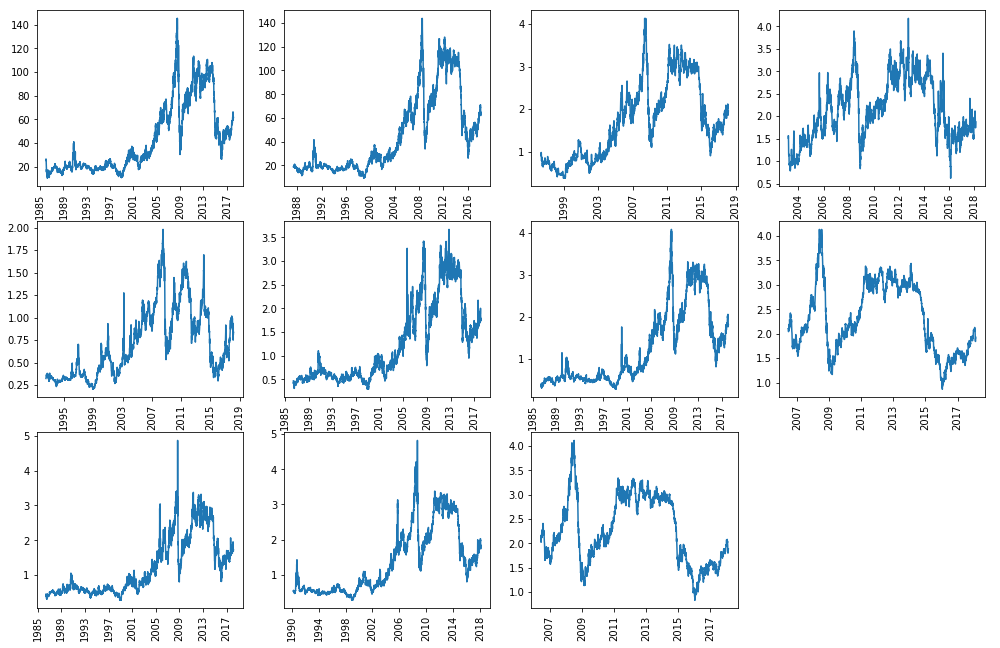

In [18]:
fig, ax = plt.subplots(3 , 4, figsize = (17, 11))

ax = ax.ravel()

for idx, i in enumerate(prices.keys()):
    x = prices[i]["df"].index
    y = prices[i]["df"].values
    
    ax[idx].plot(x, y)
    
    for tick in ax[idx].get_xticklabels():
        tick.set_rotation(90)

# we do not need the last ax, so we can set off.
ax[11].axis('off')
plt.show()


### Join Data

Now that we have the data from the csv file, we could use pandas concat function to join the data into a single dataframe. One thing to note, we must have a good index to match on every data frame. For example, there is a Day index on every data frame. 

The concat function uses a list of dataframes. So we can loop though the prices dictionary to add each data frame to the loop. 


In [19]:
# create list
df_list = []

for i in prices.keys():
    df = prices[i]["df"]
    
    # append df to list
    df_list.append(df)
    

df = pd.concat(df_list)

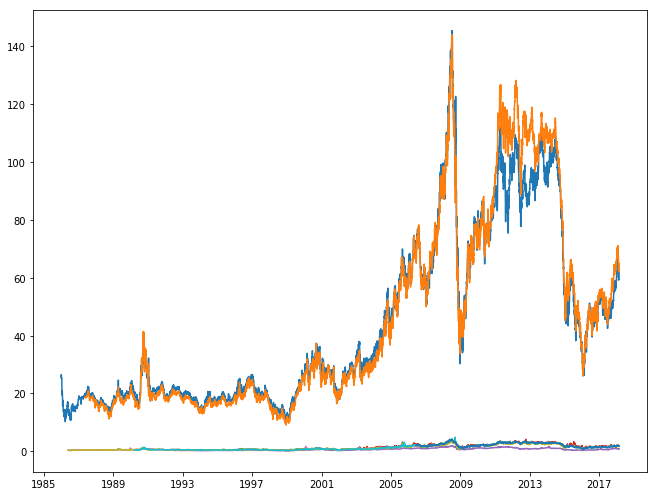

In [20]:
fig = plt.figure(figsize=(11, 8.5))

# colon at the end of the next statement prevents axis output
plt.plot(df);

### Save data for next notebook

Now that we have final dataframe  and Data Scientists are lazy, we need to make sure next notebook can load the dataframe directly. We can use the pickle to do this. 

In [21]:
import pickle

with open('df.pkl', 'wb') as output:
    pickle.dump(df, output, pickle.HIGHEST_PROTOCOL)

del df

#### Test Deletion

Lets use a try to catch the error to insure we have a complete running notebook. 

In [22]:
try:
    print(df)
        
except:
    print("!!!Error failed to load the data frame!!!!\n!!!no df in memory!!!")

!!!Error failed to load the data frame!!!!
!!!no df in memory!!!


#### Test open

In [23]:
with open('df.pkl', 'rb') as input:
    df = pickle.load(input)

In [24]:
df.describe()

,Cushing OK WTI Spot Price FOB Dollars per Barrel,Europe Brent Spot Price FOB Dollars per Barrel,Los Angeles CA Ultra-Low Sulfur CARB Diesel Spot Price Dollars per Gallon,Los Angeles Reformulated RBOB Regular Gasoline Spot Price Dollars per Gallon,Mont Belvieu TX Propane Spot Price FOB Dollars per Gallon,New York Harbor Conventional Gasoline Regular Spot Price FOB Dollars per Gallon,New York Harbor No. 2 Heating Oil Spot Price FOB Dollars per Gallon,New York Harbor Ultra-Low Sulfur No 2 Diesel Spot Price Dollars per Gallon,U.S. Gulf Coast Conventional Gasoline Regular Spot Price FOB Dollars per Gallon,U.S. Gulf Coast Kerosene-Type Jet Fuel Spot Price FOB Dollars per Gallon,U.S. Gulf Coast Ultra-Low Sulfur No 2 Diesel Spot Price Dollars per Gallon
count,8103.000000,7810.000000,5504.000000,3773.000000,6447.000000,7997.000000,7995.000000,2960.000000,7996.000000,7018.000000,2960.000000
mean,43.187777,45.175796,1.696595,2.137820,0.708993,1.250340,1.255674,2.304843,1.221691,1.376256,2.258484
std,29.700457,33.101915,0.897793,0.668386,0.385696,0.835032,0.888127,0.699125,0.819157,0.920796,0.693238
min,10.250000,9.100000,0.375000,0.618000,0.204000,0.290000,0.284000,0.862000,0.270000,0.282000,0.827000
25%,19.505000,18.562500,0.850000,1.618000,0.366000,0.560000,0.539000,1.711750,0.546000,0.566000,1.655750
50%,29.170000,29.125000,1.598500,2.068000,0.595000,0.855000,0.802000,2.154500,0.843000,1.019000,2.132000
75%,62.395000,64.617500,2.315000,2.709000,0.978000,1.840000,1.809000,2.971250,1.801000,2.004000,2.922000
max,145.310000,143.950000,4.133000,4.177000,1.980000,3.665000,4.083000,4.134000,4.873000,4.814000,4.115000


** Success! **

### Whats next

Looks like our dataframe opened up perfectly. 

We were able to mine the excel files for the data with ease. This was a reasonably simple example. In most cases the csv files are not so easily mined. The idea was to start with an easy task so everyone can follow along. 

If the data is not well structured for a pandas dataframe, I recommend that you using open as below. 


```python
with open(fname) as f:
    content = f.readlines()
```

Next up statistics and visualizations!!! FUN FUN!!!

In [25]:
with open('price_dict.pkl', 'wb') as output:
    
    pickle.dump(prices, output, pickle.HIGHEST_PROTOCOL)

del prices

### ** AJM to do list **

    Add abstract
    Spell check entire page
    Add eia background information

    Can the data be independently varified?